# Imports

In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization

In [0]:
drive.mount('/content/drive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls drive/My\ Drive

'Colab Notebooks'   HH_paramter_space_40s.csv   para_comb_20p_sample.csv
 Figures	    HH_voltage_40s.csv	        PR_ag.csv
 HH_ag.csv	    Models		        voltages_AP_30sek_sample.csv


In [0]:
import pandas as pd
import numpy as np
import os

In [0]:
%%time
PRv_df = pd.DataFrame()
for i,tmp_df in enumerate(pd.read_csv("drive/My Drive/voltages_AP_30sek_sample.csv",header=None,engine='python',chunksize=50000)):
  PRv_df = pd.concat([PRv_df,tmp_df],axis=0)

CPU times: user 2min 32s, sys: 12.1 s, total: 2min 44s
Wall time: 2min 54s


In [0]:
%%time
PRss_df = pd.read_csv("drive/My Drive/para_comb_20p_sample.csv",header=None,engine='python')
print(PRss_df.shape)
print(PRss_df.size)

(100000, 13)
1300000
CPU times: user 1.42 s, sys: 102 ms, total: 1.52 s
Wall time: 2.15 s


In [0]:
ssnames = ['Cm','gL','gNa','EL','eNa','EK','gc','gkdr','gAHP','gC','gCa','ECa','p']

In [0]:
%%time
HHss_df = pd.read_csv("drive/My Drive/HH_paramter_space_40s.csv",index_col=0)

CPU times: user 10.4 ms, sys: 4.02 ms, total: 14.4 ms
Wall time: 266 ms


In [0]:
%%time
HHv_df = pd.read_csv("drive/My Drive/HH_voltage_40s.csv",index_col=0)

CPU times: user 1.34 s, sys: 176 ms, total: 1.51 s
Wall time: 2.31 s


In [0]:
HHv = HHv_df.values[:,:1201]
HHss = HHss_df.values
PRv = PRv_df.values
PRss = PRss_df.values

# Aggregated features

In [0]:
from scipy.signal import find_peaks
from scipy.signal import peak_widths


def action_potentials(X,aplimit=-20):
  action_potentials = []
  ap_amps = []
  widths = []
  widths_plotting = []

  for x in X:
    peaks,d = find_peaks(x, height=aplimit)
    if len(peaks)>0:
      ap_amps.append(d['peak_heights'])
    else:
      ap_amps.append(np.array([]))

    results_half = peak_widths(x, peaks, rel_height=0.5)
    widths.append(results_half[0])  # widths
    widths_plotting.append(results_half[1:])
    
    
    action_potentials.append(peaks)
  return np.array(action_potentials),np.array(ap_amps),np.array(widths),np.array(widths_plotting)

In [0]:
from scipy.signal import find_peaks
from scipy.signal import peak_widths


def aggregated_features(X,aplimit=-20):
  action_potentials = []
  ap_amps = []
  widths = []
  widths_plotting = []

  for x in X:
    peaks,d = find_peaks(x, height=aplimit)
    if len(peaks)>0:
      ap_amps.append(d['peak_heights'])
    else:
      ap_amps.append(np.array([]))

    results_half = peak_widths(x, peaks, rel_height=0.5)
    widths.append(results_half[0])  # widths
    widths_plotting.append(results_half[1:])
    
    
    action_potentials.append(peaks)
  return np.array(action_potentials),np.array(ap_amps),np.array(widths),np.array(widths_plotting)

## Aggregated features from membrane potentials from the Hodgkin-Huxley model

In [0]:
%%time
Hap,Hamp,Hapw,Hapwpl = action_potentials(HHv)

CPU times: user 248 ms, sys: 4 ms, total: 252 ms
Wall time: 257 ms


## Aggregated features from membrane potentials from the Pinsky-Rinzel model

In [0]:
%%time
PRap,PRamp,PRapw,PRapwpl = action_potentials(PRv)

CPU times: user 14.1 s, sys: 204 ms, total: 14.3 s
Wall time: 14.3 s


## Example of aggregated features of the  Hodgkin-Huxley model

Text(0.5, 1.0, '5 action potentials')

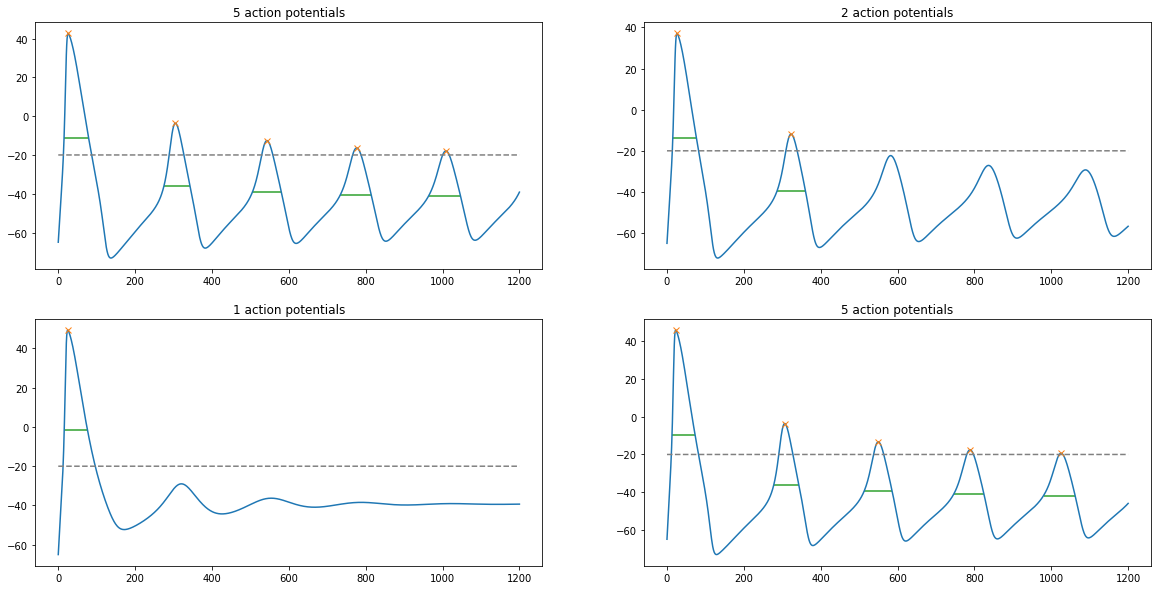

In [0]:
import matplotlib.pyplot as plt
aplimit = np.zeros((1201,1))-20


plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
ind=0
plt.plot(HHv[ind,:])
plt.plot(Hap[ind],Hamp[ind],"x")
plt.plot(aplimit, "--", color="gray")
plt.hlines(*Hapwpl[ind], color="C2")


plt.title(str(len(Hap[ind])) + ' action potentials')

plt.subplot(2,2,2)
ind=4
plt.plot(HHv[ind,:])
plt.plot(Hap[ind],Hamp[ind],"x")
plt.plot(aplimit, "--", color="gray")
plt.hlines(*Hapwpl[ind], color="C2")

plt.title(str(len(Hap[ind])) + ' action potentials')

plt.subplot(2,2,3)
ind=123
plt.plot(HHv[ind,:])
plt.plot(Hap[ind],Hamp[ind],"x")
plt.plot(aplimit, "--", color="gray")
plt.hlines(*Hapwpl[ind], color="C2")

plt.title(str(len(Hap[ind])) + ' action potentials')


plt.subplot(2,2,4)
ind=234
plt.plot(HHv[ind,:])
plt.plot(Hap[ind],Hamp[ind],"x")
plt.plot(aplimit, "--", color="gray")
plt.hlines(*Hapwpl[ind], color="C2")

plt.title(str(len(Hap[ind])) + ' action potentials')




Text(0.5, 1.0, '2 action potentials')

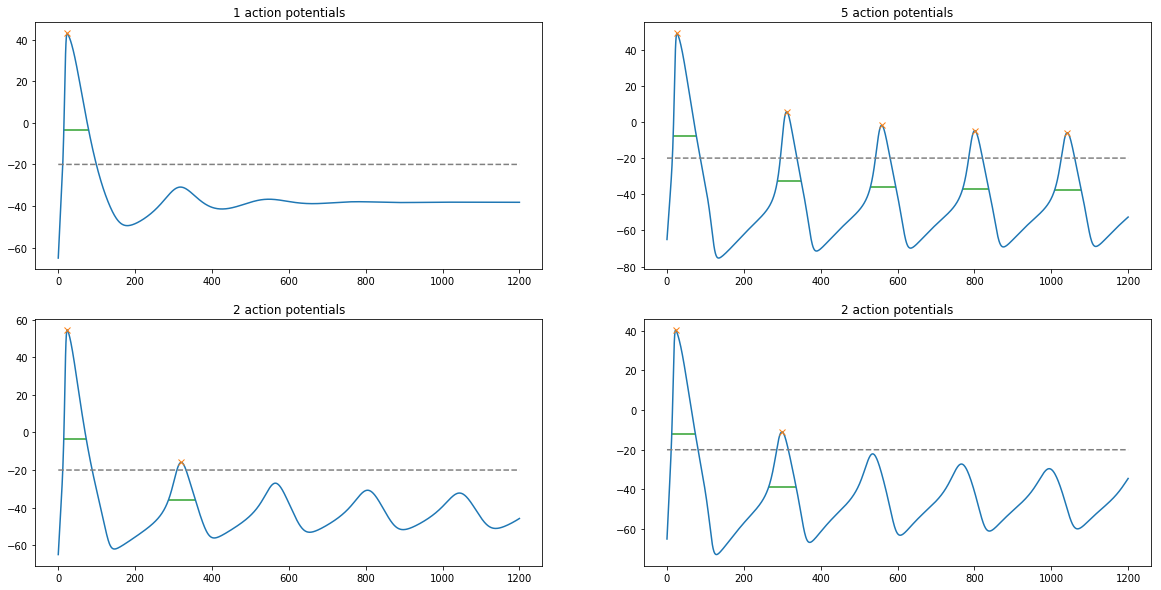

In [0]:
aplimit = np.zeros((1201,1))-20


inds = np.random.randint(HHv.shape[0], size=4)

plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
ind=inds[0]
plt.plot(HHv[ind,:])
plt.plot(Hap[ind],Hamp[ind],"x")
plt.plot(aplimit, "--", color="gray")
plt.hlines(*Hapwpl[ind], color="C2")


plt.title(str(len(Hap[ind])) + ' action potentials')

plt.subplot(2,2,2)
ind=inds[1]
plt.plot(HHv[ind,:])
plt.plot(Hap[ind],Hamp[ind],"x")
plt.plot(aplimit, "--", color="gray")
plt.hlines(*Hapwpl[ind], color="C2")

plt.title(str(len(Hap[ind])) + ' action potentials')

plt.subplot(2,2,3)
ind=inds[2]
plt.plot(HHv[ind,:])
plt.plot(Hap[ind],Hamp[ind],"x")
plt.plot(aplimit, "--", color="gray")
plt.hlines(*Hapwpl[ind], color="C2")

plt.title(str(len(Hap[ind])) + ' action potentials')


plt.subplot(2,2,4)
ind=inds[3]
plt.plot(HHv[ind,:])
plt.plot(Hap[ind],Hamp[ind],"x")
plt.plot(aplimit, "--", color="gray")
plt.hlines(*Hapwpl[ind], color="C2")

plt.title(str(len(Hap[ind])) + ' action potentials')




In [0]:
Hap,Hamp,Hapw,Hapwpl

n_ap = np.array([len(hap) for hap in Hap])
first_aptime = np.array([hap[0] if len(hap)>0 else np.nan for hap in Hap])
first_apamp = np.array([hamp[0] if len(hamp)>0 else np.nan for hamp in Hamp])
first_apwidth = np.array([hapw[0] if len(hapw)>0 else np.nan for hapw in Hapw])

HH_ag_df = pd.DataFrame(n_ap,columns=['n_ap'])
HH_ag_df['first_ap_time'] = first_aptime
HH_ag_df['first_ap_amp'] = first_apamp
HH_ag_df['first_ap_width'] = first_apwidth

In [0]:
HH_ag_df.describe()

,n_ap,first_ap_time,first_ap_amp,first_ap_width
count,2187.000000,2187.000000,2187.000000,2187.000000
mean,1.938729,24.066301,46.795575,59.894944
std,1.369146,1.903840,5.419999,3.550685
min,1.000000,20.000000,35.199076,50.023418
25%,1.000000,22.000000,42.178957,57.317456
50%,1.000000,24.000000,46.802742,59.792519
75%,2.000000,26.000000,51.424155,62.371257
max,6.000000,29.000000,58.007080,70.741294


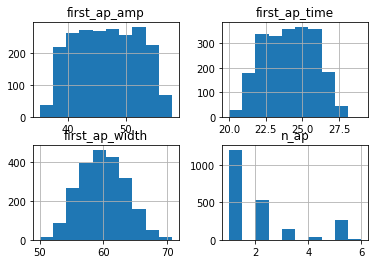

In [0]:
HH_ag_df.hist(); # Histogram of all four aggregated features from Hodgkin Huxley model

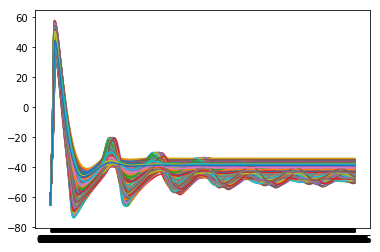

In [0]:
plt.plot(HHv_df[HH_ag_df['n_ap'] == 1].T); # The next plots shows the behaviour of membrane potentials only achiving one AP

## Example of aggregated features of the  Pinsky-Rinzel model

Text(0.5, 1.0, '1 action potentials')

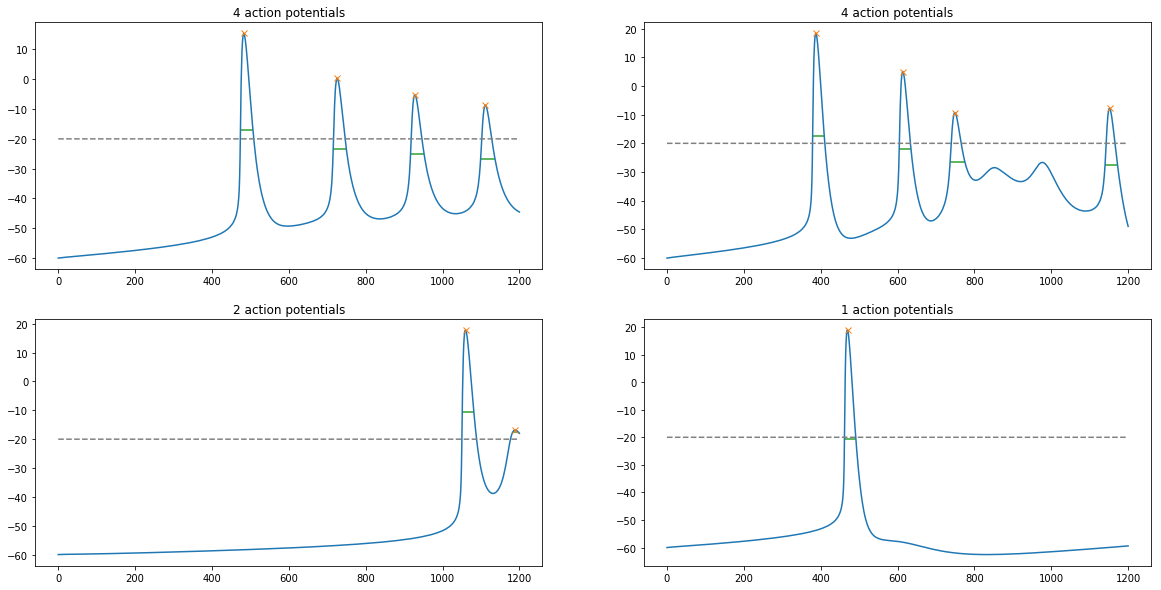

In [0]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
ind=302
plt.plot(PRv[ind,:])
plt.plot(PRap[ind],PRamp[ind],"x")
plt.plot(aplimit, "--", color="gray")
plt.hlines(*PRapwpl[ind], color="C2")

plt.title(str(len(PRap[ind])) + ' action potentials')

plt.subplot(2,2,2)
ind=51592
plt.plot(PRv[ind,:])
plt.plot(PRap[ind],PRamp[ind],"x")
plt.plot(aplimit, "--", color="gray")
plt.hlines(*PRapwpl[ind], color="C2")


plt.title(str(len(PRap[ind])) + ' action potentials')

plt.subplot(2,2,3)
ind=1234
plt.plot(PRv[ind,:])
plt.plot(PRap[ind],PRamp[ind],"x")
plt.plot(aplimit, "--", color="gray")
plt.hlines(*PRapwpl[ind], color="C2")


plt.title(str(len(PRap[ind])) + ' action potentials')


plt.subplot(2,2,4)
ind=2345
plt.plot(PRv[ind,:])
plt.plot(PRap[ind],PRamp[ind],"x")
plt.plot(aplimit, "--", color="gray")
plt.hlines(*PRapwpl[ind], color="C2")

plt.title(str(len(PRap[ind])) + ' action potentials')


In [0]:
PRapwpl[ind]*np.array([1,0.025,0.025])

array([array([-15.44765929, -21.79815301, -27.70983039, -24.94287221]),
       array([ 408.88881835,  632.20210023,  787.912178  , 1134.08863325]),
       array([ 441.98001795,  665.88087005,  831.18209909, 1168.99254614])],
      dtype=object)

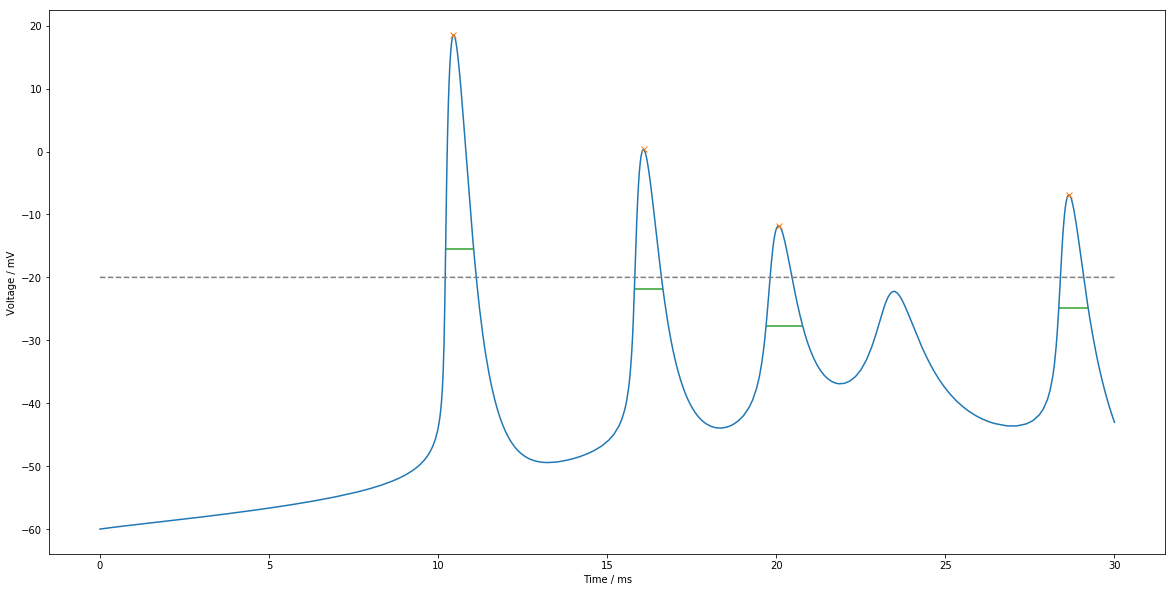

In [0]:
plt.figure(figsize=(20,10))
ind=65598
x_axis = [i*0.025 for i in range(1201)]
plt.plot(x_axis,PRv[ind,:])
plt.plot(PRap[ind]*0.025,PRamp[ind],"x")
plt.plot(x_axis,aplimit, "--", color="gray")
plt.hlines(*PRapwpl[ind]*np.array([1,0.025,0.025]), color="C2")
plt.xlabel('Time / ms')
plt.ylabel('Voltage / mV')
plt.savefig("drive/My Drive/Figures/aggregated_features.png")


Text(0.5, 1.0, '4 action potentials')

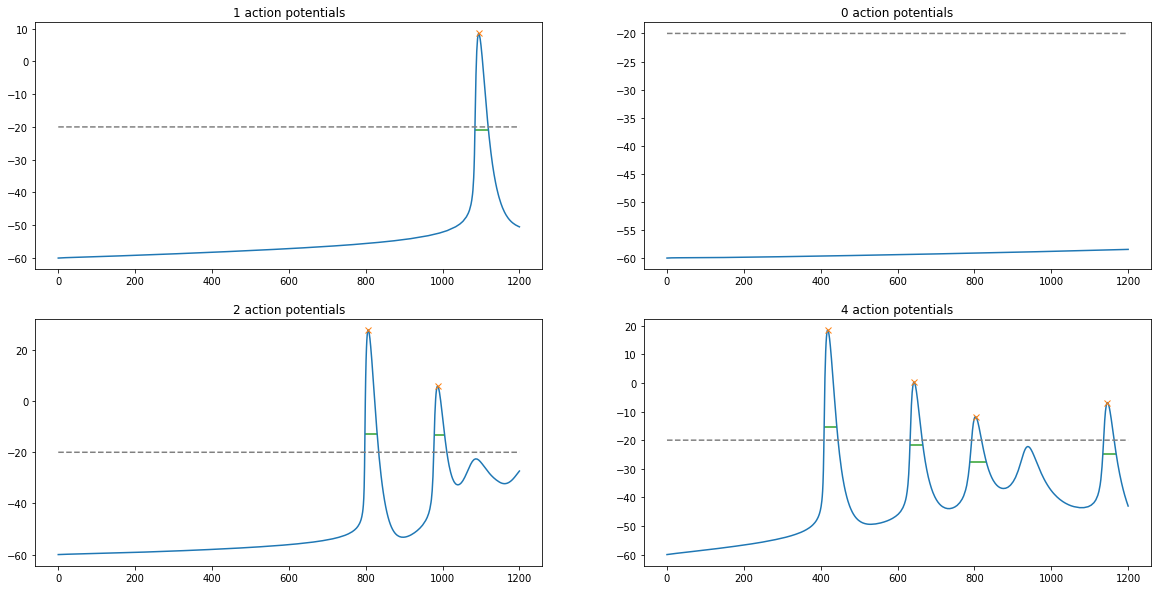

In [0]:
inds = np.random.randint(PRv.shape[0], size=4)
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
ind=inds[0]
plt.plot(PRv[ind,:])
plt.plot(PRap[ind],PRamp[ind],"x")
plt.plot(aplimit, "--", color="gray")
plt.hlines(*PRapwpl[ind], color="C2")

plt.title(str(len(PRap[ind])) + ' action potentials')

plt.subplot(2,2,2)
ind=inds[1]
plt.plot(PRv[ind,:])
plt.plot(PRap[ind],PRamp[ind],"x")
plt.plot(aplimit, "--", color="gray")
plt.hlines(*PRapwpl[ind], color="C2")


plt.title(str(len(PRap[ind])) + ' action potentials')

plt.subplot(2,2,3)
ind=inds[2]
plt.plot(PRv[ind,:])
plt.plot(PRap[ind],PRamp[ind],"x")
plt.plot(aplimit, "--", color="gray")
plt.hlines(*PRapwpl[ind], color="C2")


plt.title(str(len(PRap[ind])) + ' action potentials')


plt.subplot(2,2,4)
ind=inds[3]
plt.plot(PRv[ind,:])
plt.plot(PRap[ind],PRamp[ind],"x")
plt.plot(aplimit, "--", color="gray")
plt.hlines(*PRapwpl[ind], color="C2")


plt.title(str(len(PRap[ind])) + ' action potentials')


In [0]:
n_ap = np.array([len(prap) for prap in PRap])
first_aptime = np.array([prap[0] if len(prap)>0 else np.nan for prap in PRap])
first_apamp = np.array([pramp[0] if len(pramp)>0 else np.nan for pramp in PRamp])
first_apwidth = np.array([prapw[0] if len(prapw)>0 else np.nan for prapw in PRapw])

PR_ag_df = pd.DataFrame(n_ap,columns=['n_ap'])
PR_ag_df['first_ap_time'] = first_aptime
PR_ag_df['first_ap_amp'] = first_apamp
PR_ag_df['first_ap_width'] = first_apwidth

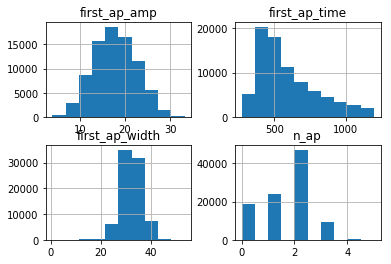

In [0]:
PR_ag_df.hist();

In [0]:
!ls Drive/My\ Drive/Figures/

ls: cannot access 'Drive/My Drive/Figures/': No such file or directory


# Plots of the membrane potentials (All, Mean+STD)

CPU times: user 2min 56s, sys: 5.13 s, total: 3min 1s
Wall time: 3min 1s


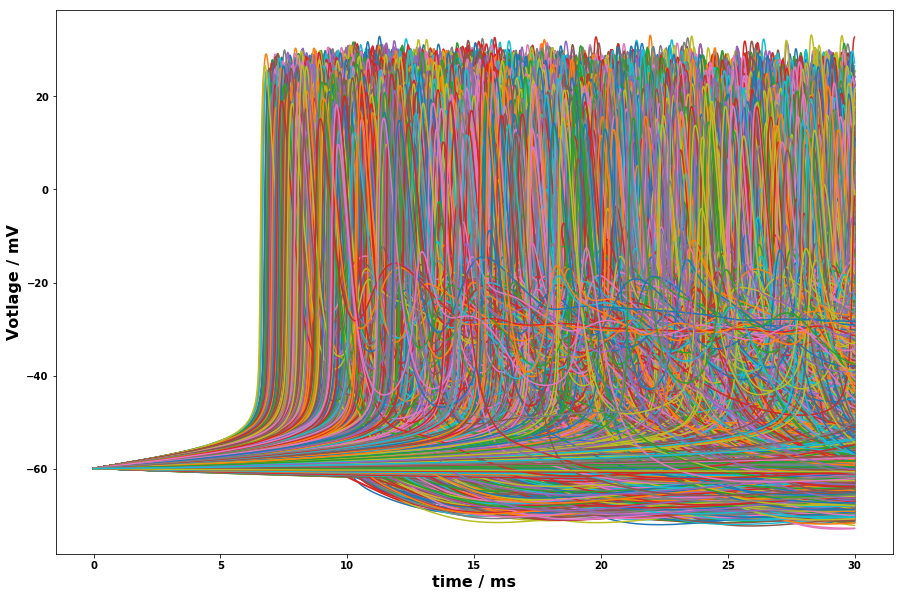

In [0]:
%%time
fig = plt.figure(figsize=(15,10))
x_axis = [i*0.025 for i in range(1201)]
plt.plot(x_axis,PRv[:100000,:].T);
ax = plt.gca()
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontweight('bold')
plt.xlabel('time / ms', fontsize=16, fontweight='bold')
plt.ylabel('Votlage / mV', fontsize=16, fontweight='bold')
plt.savefig("drive/My Drive/Figures/RP3.png")

CPU times: user 4.7 s, sys: 208 ms, total: 4.9 s
Wall time: 4.67 s


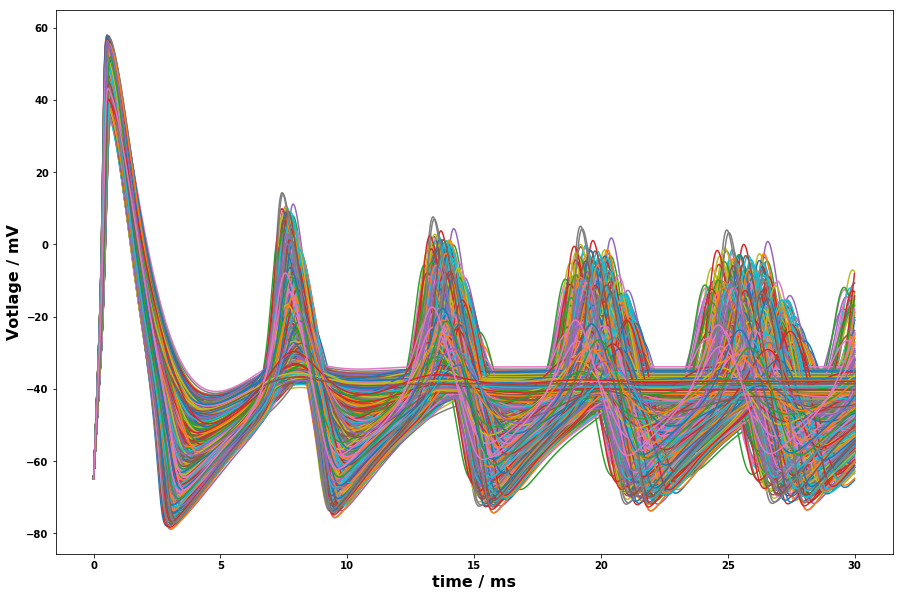

In [0]:
%%time
fig = plt.figure(figsize=(15,10))
x_axis = [i*0.025 for i in range(1201)]
plt.plot(x_axis,HHv[:,:].T);
ax = plt.gca()
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontweight('bold')
plt.xlabel('time / ms', fontsize=16, fontweight='bold')
plt.ylabel('Votlage / mV', fontsize=16, fontweight='bold')
plt.savefig("drive/My Drive/Figures/HH.png")

CPU times: user 1.22 s, sys: 130 ms, total: 1.35 s
Wall time: 1.21 s


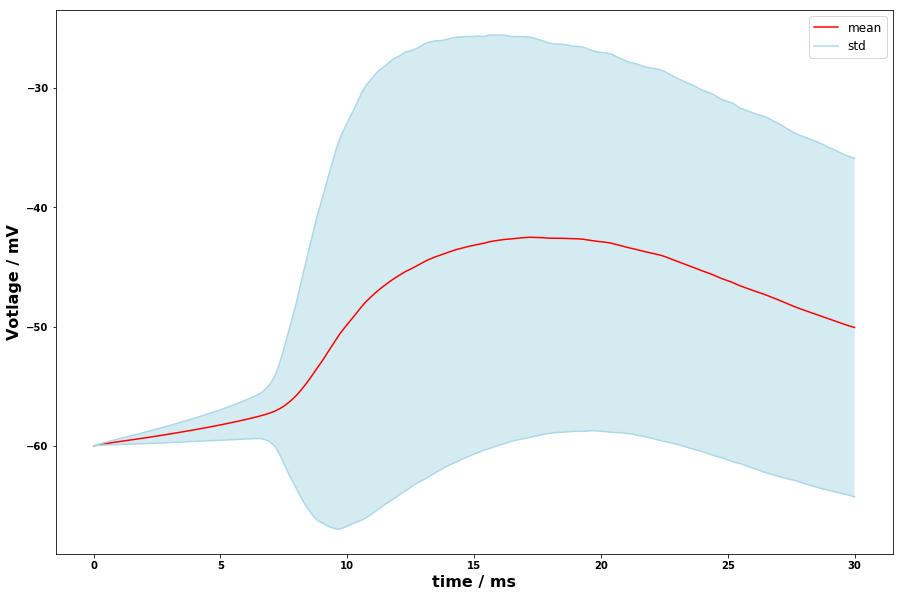

In [0]:
%%time
import matplotlib
matplotlib.rcParams.update({'legend.fontsize':12})

fig = plt.figure(figsize=(15,10))
mu = np.mean(PRv,axis=0)
std = np.std(PRv,axis=0)

upper = mu+std
lower = mu-std

plt.plot(x_axis,mu,'r',label='mean')
plt.plot(x_axis,upper,'lightblue',alpha=1,label='std')
plt.plot(x_axis,lower,'lightblue',alpha=1)
plt.fill_between(x_axis,lower,upper,facecolor='lightblue',alpha=0.5) ;
ax = plt.gca()
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontweight('bold')
plt.xlabel('time / ms', fontsize=16, fontweight='bold')
plt.ylabel('Votlage / mV', fontsize=16, fontweight='bold')
plt.legend()
plt.savefig("drive/My Drive/Figures/PR_std.png")


CPU times: user 312 ms, sys: 130 ms, total: 442 ms
Wall time: 293 ms


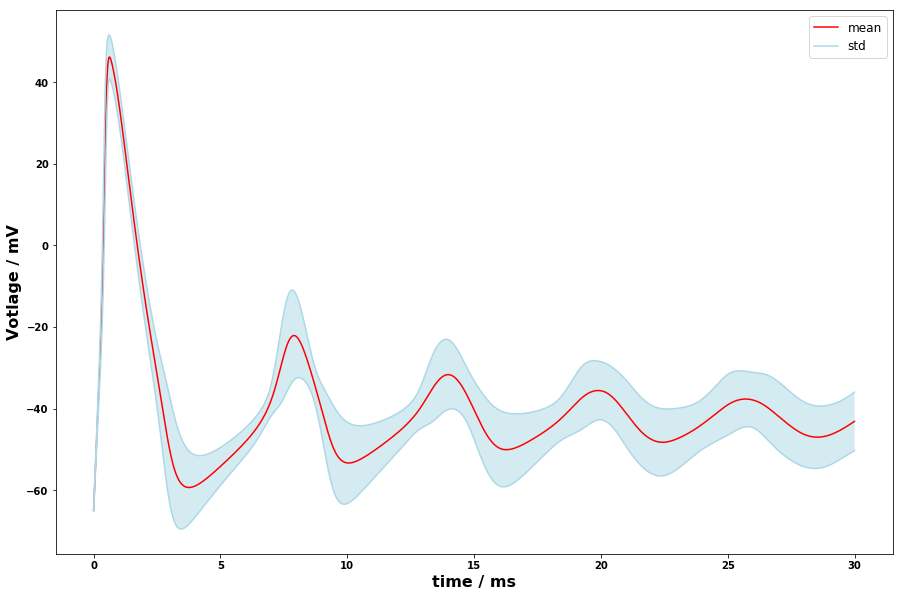

In [0]:
%%time
import matplotlib
matplotlib.rcParams.update({'legend.fontsize':12})

fig = plt.figure(figsize=(15,10))
mu = np.mean(HHv,axis=0)
std = np.std(HHv,axis=0)

upper = mu+std
lower = mu-std

plt.plot(x_axis,mu,'r',label='mean')
plt.plot(x_axis,upper,'lightblue',alpha=1,label='std')
plt.plot(x_axis,lower,'lightblue',alpha=1)
plt.fill_between(x_axis,lower,upper,facecolor='lightblue',alpha=0.5) ;
ax = plt.gca()
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontweight('bold')
plt.xlabel('time / ms', fontsize=16, fontweight='bold')
plt.ylabel('Votlage / mV', fontsize=16, fontweight='bold')
plt.legend()
plt.savefig("drive/My Drive/Figures/HH_std.png")
